# Perturbation Method for Uncertainty Propagation
 **Saleh Rezaeiravesh and Philipp Schlatter** <br/> 
 saleh.rezaeiravesh@manchester.ac.uk and pschlatt@mech.kth.se <br/> 
 Modelling & Simulation, Department of Mechanical, Aerospace and Civil Engineering (MACE), The University of Manchester, UK <br/> 
 SimEx/FLOW, Engineering Mechanics, KTH Royal Institute of Technology, Sweden
___


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as mt
sys.path.append('./modules')
import grafix

### Learning Objectives

* Concept of perturbation method for uncertainty propagation,
* Pros and cons of the perturbation method, 
* Connection between the perturbation method and local sensitivity analysis.

## Introduction
Consider 

$$
\begin{equation}
y=f(\mathbf{q},\chi) \,,
\end{equation}
$$

where $\mathbf{q}\in \mathbb{Q}\subset \mathbb{R}^p$ are uncertain parameters and $\chi$ are design variables. 

Perturbation methods can be used for uncertainty propagation from uncertain parameters $\mathbf{q}$ with a given distribution into the model response $y$. 
These methods are less expensive than the sample-based methods, but as you will see in this notebook, they rely on the linearization of the model function $f(\mathbf{q})$ with respect to $\mathbf{q}$. 

## Perturbation Method
Consider $y=f(\mathbf{q},\chi)$ to be univariate model response. 
We can perturb the model function around the nominal value $\bar{\mathbf{q}}$. To this end, The Taylor expansion can be used (we drop $\chi$ for brevity), see e.g. [Smith 2013](https://rsmith.math.ncsu.edu/UQ_TIA/):

$$
\begin{eqnarray}
f(\mathbf{q}) &=& f(\bar{\mathbf{q}}+\delta \mathbf{q}) = f(q_1+\delta q_1,q_2+\delta q_2,\cdots,q_p+\delta q_p) \\
&\approx& f(\bar{\mathbf{q}}) + \sum_{i_1=1}^p \frac{\partial f}{\partial q_{i_1}}|_{\bar{\mathbf{q}}} \delta q_{i_1} \\
&+& \frac{1}{2}\sum_{i_1,i_2=1}^p \frac{\partial^2 f}{\partial q_{i_1}\partial q_{i_2}}|_{\bar{\mathbf{q}}}\delta q_{i_1}\delta q_{i_2} + \cdots\\
&+& \frac{1}{n!}\sum_{i_1,\cdots, i_n=1}^p \frac{\partial^n f}{\partial q_{i_1}\cdots\partial q_{i_n}}|_{\bar{\mathbf{q}}}\delta q_{i_1}\cdots\delta q_{i_n} 
\end{eqnarray}
$$

Considring only the linear terms leads to the following expression for uncertainty propagation:

$$
\begin{equation}
f(\mathbf{q}) = f(\bar{\mathbf{q}}) + \sum_{i=1}^p s_i \delta q_i \,,
\end{equation}
$$

where, $s_i=\partial f/\partial q_i|_{\bar{q}_i}$ is the sensitivity of $y=f(\mathbf{q})$ to the $i$-th parameter. 

The extension of this expression for a multivariate model is straight-forward. 

## Application to Linear Models

* For linear models $f(\mathbf{q},\chi)$, application of the perturbation method is straightforward and leads to accurate estimates. 

* If $\mathbf{q}$ are Gaussian distribution, the response of a linear model $f(\mathbf{q})$ will have a Gaussian distribution.

### Example
Consider $y=f(\mathbf{q})=a_1q_1+a_2q_2$ where $a_1$ and $a_2$ are two constants, and $q_1\sim\mathcal{N}(\bar{q}_1,\sigma_{q_1}^2)$,  $q_2\sim\mathcal{N}(\bar{q}_2,\sigma_{q_2}^2)$ and $\text{cor}(q_1,q_2)=\rho_{12}$.


$$
\bar{y}=\mathbb{E}[f(\mathbf{q})] = f(\bar{\mathbf{q}}) = a_1\bar{q}_1+a_2\bar{q}_2 \,,
$$

$$
\begin{eqnarray}
\mathbb{V}[f(\mathbf{q})] &=& 
[a_1,a_2] 
\begin{bmatrix}
\sigma_{q_1}^2 & \text{cov}(q_1,q_2) \\
\text{cov}(q_1,q_2) & \sigma_{q_2}^2
\end{bmatrix}
\begin{bmatrix}
a_1\\a_2\\
\end{bmatrix}
&=&
a_1^2 \sigma_1^2 + 2a_1a_2 \sigma_1\sigma_2 \rho_{12}+ a_2^2 \sigma_2^2 \,.
\end{eqnarray}
$$

In addition to the above stochastic moments, we may be interested in knowing the distribution of the $f(\mathbf{q})$.
Looking in the derivations, for instance in this  [link](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables), it is resulted that for the given uncertain parameters, the distribution of $f(\mathbf{q})$ is multi-variate Gaussian.

Perturbation Method:
E[f(q)] = 26, V[f(q)] = 81.25
Sampling Method:
E[f(q)] = 26.0027, V[f(q)] = 81.2512


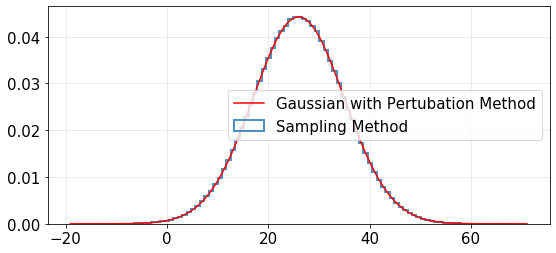

In [2]:
#settings
M=[4,6]             #mean of q1,q2
sig=[2.5,1.5,0.8]   #sigma_1, sigma_2, rho12
a=[2,3]  #a1,a2

#Perturbation method
print('Perturbation Method:')
mean_pert=a[0]*M[0]+a[1]*M[1]
var_pert=a[0]**2*sig[0]**2+2*a[0]*a[1]*sig[0]*sig[1]*sig[2]+a[1]**2*sig[1]**2
print('E[f(q)] = %g, V[f(q)] = %g' %(mean_pert,var_pert))

#MC sampling method
K=np.asarray([[sig[0]**2,sig[0]*sig[1]*sig[2]],[sig[0]*sig[1]*sig[2],sig[1]**2]])
q = np.random.multivariate_normal(mean=M, cov=K, size=1000000)
z=a[0]*q[:,0]+a[1]*q[:,1]

print('Sampling Method:')
mean_sam=np.mean(z)
var_sam=np.std(z)**2
print('E[f(q)] = %g, V[f(q)] = %g' %(mean_sam,var_sam))

#plot pdfs
plt.figure(figsize=(9,4))
x_=np.linspace(mean_pert-5*mt.sqrt(var_pert),mean_pert+5*mt.sqrt(var_pert),100)
plt.plot(x_,stats.norm.pdf(x_, mean_pert,mt.sqrt(var_pert)),'-r',label='Gaussian with Pertubation Method')
_=plt.hist(z,bins=100,density=True,histtype='step',alpha=0.8,lw=2,label='Sampling Method')
plt.legend(loc='best')
plt.grid(alpha=0.3)

## Application to Non-linear Models

Application of the perturbation method to non-linear models is approximate and can be inaccurate. Also it does not lead to straightforward estimation of the distribution of the response. 

### Example
Consider $y=f(\mathbf{q}) = q_1 q_2$ with $q_1\sim\mathcal{N}(\bar{q}_1,\sigma_{q_1}^2)$,  $q_2\sim\mathcal{N}(\bar{q}_2,\sigma_{q_2}^2)$ and $\text{cor}(q_1,q_2)=\rho_{12}$.

$$
\bar{y}=\mathbb{E}[f(\mathbf{q})] = f(\bar{\mathbf{q}}) = \bar{q}_1\bar{q}_2 \,,
$$

$$
\begin{eqnarray}
\mathbb{V}[f(\mathbf{q})] &=& 
[\bar{q}_2,\bar{q}_1] 
\begin{bmatrix}
\sigma_{q_1}^2 & \text{cov}(q_1,q_2) \\
\text{cov}(q_1,q_2) & \sigma_{q_2}^2
\end{bmatrix}
\begin{bmatrix}
\bar{q}_2\\\bar{q}_1\\
\end{bmatrix}
&=&
\bar{q}_2^2 \sigma_1^2 + 2\bar{q}_1\bar{q}_2 \sigma_1\sigma_2 \rho_{12}+ \bar{q}_1^2 \sigma_2^2 \,.
\end{eqnarray}
$$

Although, we could obtain estimates for the stochastic mean and variance of $f(\mathbf{q})$, the distribution of this function is not obtained directly from the perturbation method. 
To show the non-triviality of the resulting distribution, here we use random sampling method.

Perturbation Method:
E[f(q)] = 24, V[f(q)] = 405
Sampling Method:
E[f(q)] = 26.9652, V[f(q)] = 427.217


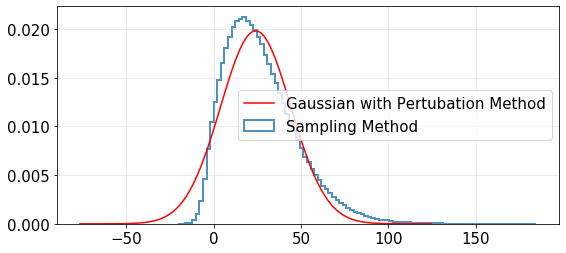

In [3]:
#settings
M=[4,6]  #mean of q1,q2
sig=[2.5,1.5,0.8]   #sigma_1, sigma_2, rho12

#Perturbation method
print('Perturbation Method:')
mean_pert=M[0]*M[1]
var_pert=M[1]**2*sig[0]**2+2*M[0]*M[1]*sig[0]*sig[1]*sig[2]+M[0]**2*sig[1]**2
print('E[f(q)] = %g, V[f(q)] = %g' %(mean_pert,var_pert))

#MC sampling method
K=np.asarray([[sig[0]**2,sig[0]*sig[1]*sig[2]],[sig[0]*sig[1]*sig[2],sig[1]**2]])
q = np.random.multivariate_normal(mean=M, cov=K, size=1000000)
z=q[:,0]*q[:,1]

print('Sampling Method:')
mean_sam=np.mean(z)
var_sam=np.std(z)**2
print('E[f(q)] = %g, V[f(q)] = %g' %(mean_sam,var_sam))

#plot pdfs
plt.figure(figsize=(9,4))
x_=np.linspace(mean_pert-5*mt.sqrt(var_pert),mean_pert+5*mt.sqrt(var_pert),100)
plt.plot(x_,stats.norm.pdf(x_, mean_pert,mt.sqrt(var_pert)),'-r',label='Gaussian with Pertubation Method')
_=plt.hist(z,bins=100,density=True,histtype='step',alpha=0.8,lw=2,label='Sampling Method')
plt.legend(loc='best')
plt.grid(alpha=0.3)

**Discussion**
Adopt different values for $\sigma_{q_1}$, $\sigma_{q_2}$, $\rho_{12}$ and observe how the resulting PDF of $y=f(\mathbf{q})=q_1 q_2$ as well as the estimated moments of $f(\mathbf{q})$ change between the perturbation and sampling methods. 

* Which one do you trust more: Perturbation or sampling method?
* Why one would be interested in the perturbation method?

**Further Reading** Exact expression for the PDF of $y=q_1 q_2$ with the two parameters taken from a multivariate Gaussian distribution was a long standing problem. 
Such expression was finally derived in [Cui et al. 2016](https://ieeexplore.ieee.org/document/7579552) and [Nadarajahah and Poganyb](https://www.sciencedirect.com/science/article/pii/S1631073X15002873).

## Example: The Rosenbrock Function
The [Rosenbrock Function](https://en.wikipedia.org/wiki/Rosenbrock_function) is algebraic with two uncertain parameters $q_1$ and $q_2$:

$$
\begin{equation}
f(q_1,q_2) = a(q_2-q_1^2)^2 + (b-q_1)^2  \,,
\end{equation}
$$

where $a$ and $b$ are two fixed constants with default values $a=100$ and $b=1$.

In [4]:
Rsbrk = lambda a,b,q1,q2 : a*(q2-q1**2)**2+(b-q1)**2

Assume $q_1\sim\mathcal{N}(\bar{q}_1,\sigma_{q_1}^2)$,  $q_2\sim\mathcal{N}(\bar{q}_2,\sigma_{q_2}^2)$ and $\text{cor}(q_1,q_2)=\rho_{12}$. 
For the perturbation method, we need to compute sensitivity matrix $\mathbf{S}$ which in this case becomes:
$$
\mathbf{S} = [-4 a q_1 (q_2-q_1^2)-2(b-q_1) \,,\, 
              2a(q_2-q_1^2)] \,.
$$
Evaluating $\mathbf{S}$ at $\bar{q}_1$ and $\bar{q}_2$ and using the covariance matrix of $q_1$ and $q_2$ leads to an estimate of the variance of $f(\mathbf{q})$.

In [5]:
def Rsbrk_S(a,b,q1,q2):
    """
    Sensitivity matrix of the Rosenbrock function
    """
    S1=-4*a*q1*(q2-q1**2)-2*(b-q1)
    S2=2*a*(q2-q1**2)
    S=np.vstack((S1,S2))
    return S

We can evaluate the stochastic mean and variance of the function for given Gaussian distributions of $q_1$ and $q_2$.

In [6]:
a=100  #constants
b=1

mRS=[1,0.5]  #mean of q1~Gaussian,q2~Gaussian
sRS=[0.2,0.1,0.8]  #sdev of q1, sdev of q2, rho12

#Mean of f(q)
M_=Rsbrk(a,b,mRS[0],mRS[1])
print("mean[f(q)]=",M_)

#Variance of f(q)
Sigma=np.asarray([[sRS[0]**2,sRS[0]*sRS[1]*sRS[2]],[sRS[0]*sRS[1]*sRS[2],sRS[1]**2]])
X=Rsbrk_S(a,b,mRS[0],mRS[1])
V_=X.T@Sigma@X
print("var[f(q)]=",V_[0][0])

mean[f(q)]= 25.0
var[f(q)]= 1060.0000000000002


## Hands-on: Damped Harmonic Oscillator

Consider the simple system consisting of a mass $m$, a damper with damping coefficient $c$, and a spring with constant $k$. For oscillations with no forcing in the vertical direction, the dynamics of the system is described by the following 2nd-order ODE:
    
$$
\begin{equation}
\ddot{y} + C \dot{y} + K y =0 \,, \quad y(0)=y_0 \,, \dot{y}(0)=v_0 \,,
\end{equation}
$$

where $y$ is the distance from the fixed point measured downward, $C=c/m$, and $K=k/m$. The analytical solution for the above ODE is,

$$
\begin{equation}
   y(t)=\exp(-C\,t/2) \left(c_1\cos(\omega t) + c_2 \sin(\omega t) \right) \,,
\end{equation}
$$

where $c_1=y_0$, $c_2=(v_0+C y_0/2)/\omega$, and $\omega = \sqrt{K-C^2/4}$. 

Tasks:
* Assume all the four parameters $\mathbf{q}=[K,C,y_0,v_0]$ are mutually independent and have Gaussian distributions. We aim at seeing how much the uncertainty from these parameters would propoagate into the response $y(t)$ at different times. 
In particular, try $K\sim\mathcal{N}(20,1^2)$, $C\sim\mathcal{N}(1,0.1^2)$, $y_0\sim\mathcal{N}(0,0.15^2)$, $v_0\sim\mathcal{N}(1,0.1^2)$, and $t\in[0,6]$.

* Repeat above, assuming two or more parameters are correlated. 